In [1]:
%matplotlib inline

In [ ]:
# Add cuda support 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

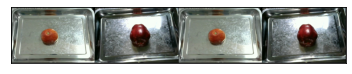

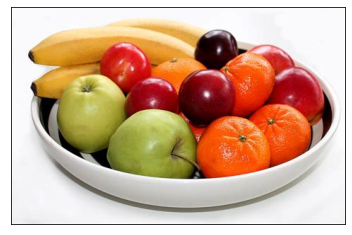

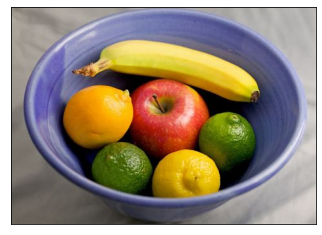

In [18]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

# Images need to be the same size to make a grid 
apple1_int = read_image(str(Path('assets') / 'Apple01.jpg'))
apple2_int = read_image(str(Path('assets') / 'Apple02.jpg'))
fruit1_int = read_image(str(Path('assets') / 'Fruit01.jpg'))
fruit2_int = read_image(str(Path('assets') / 'Fruit02.jpg'))


grid = make_grid([apple1_int, apple2_int, apple1_int, apple2_int])
show(grid)
show(fruit1_int)
show(fruit2_int)

In [21]:
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms.functional import convert_image_dtype

#batch_int = torch.stack([apple1_int, apple2_int])
batch_int = torch.stack([fruit2_int])
batch = convert_image_dtype(batch_int, dtype=torch.float)

model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

outputs = model(batch)
print(outputs)

[{'boxes': tensor([[ 83.4764,  50.5714, 414.1412, 155.1604],
        [ 83.1233, 124.2747, 190.9298, 219.3821],
        [182.5968, 111.3906, 310.1218, 242.7613],
        [220.8368, 221.7140, 323.0614, 299.1044],
        [290.8003, 164.8482, 382.1392, 269.0721],
        [ 22.9765,  14.4627, 466.5641, 330.9727],
        [125.5144, 212.4093, 218.3091, 290.9855],
        [ 48.5393, 140.8112, 415.3185, 330.9349],
        [  0.8697,   0.0000, 454.9088, 324.6042],
        [ 60.7805,  25.0123, 427.3320, 218.1961],
        [127.0682,  85.6020, 357.8823, 258.9304],
        [ 73.3515, 206.8826, 327.2109, 332.4468],
        [  3.9149, 110.0669, 219.1496, 334.4784],
        [ 57.0433,  23.3428, 424.5627, 183.8265],
        [127.9584, 212.7500, 216.7464, 291.0234],
        [290.6263, 155.7858, 385.8000, 275.6263],
        [ 85.5410, 114.1476, 222.2024, 229.8757],
        [  1.9899, 223.0605, 374.0919, 338.0000]], grad_fn=<StackBackward0>), 'labels': tensor([52, 55, 53, 55, 55, 51, 55, 51, 67, 52, 53,

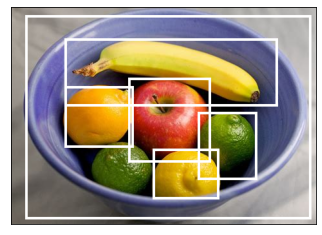

In [22]:
score_threshold = .9
apples_with_boxes = [
    draw_bounding_boxes(apple_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for apple_int, output in zip(batch_int, outputs)
]

show(apples_with_boxes)